In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.4 MB/s eta 0:00:00


In [4]:
from faker import Faker
import pandas as pd
import random
import numpy as np

In [5]:
fake = Faker()
np.random.seed(42)

In [7]:
def generate_smart_mfg_data(n_sample):
  data = []
  materials = ['Steel','Aluminium','Plastic','Cooper']
  n_sample = 1000

  for _ in range(n_sample):
    temp = np.random.normal(75,10)
    pressure = np.random.normal(30,5)
    humidity = np.random.uniform(10,90)
    speed = np.random.normal(1500,300)
    material = random.choice(materials)

    ## rule
    defect = 0
    if (temp>85 and pressure>35) or (humidity>80 and material == 'Plastic'):
      defect =1

    data.append([temp, pressure, humidity,speed,material,defect])

  df = pd.DataFrame(data, columns = ['Temperature','Pressure','Humidity','Speed','Material','Defective'])
  return df


df = generate_smart_mfg_data(n_sample=1000)
display(df)


,Temperature,Pressure,Humidity,Speed,Material,Defective
0,66.072125,32.568072,34.824679,1933.759398,Plastic,0
1,75.163156,33.951893,22.461861,1890.158058,Cooper,0
2,66.435018,30.488352,40.189054,1348.948751,Aluminium,0
3,74.053762,29.329222,13.448009,1623.632748,Cooper,0
4,71.023203,24.079847,85.822376,1621.040675,Aluminium,0
...,...,...,...,...,...,...
995,78.088526,31.041912,52.722218,1359.784177,Cooper,0
996,59.744283,24.229183,59.666611,1497.090401,Cooper,0
997,84.916472,28.202506,18.191557,1857.931102,Cooper,0
998,59.673160,24.357047,67.434962,1282.528790,Plastic,0


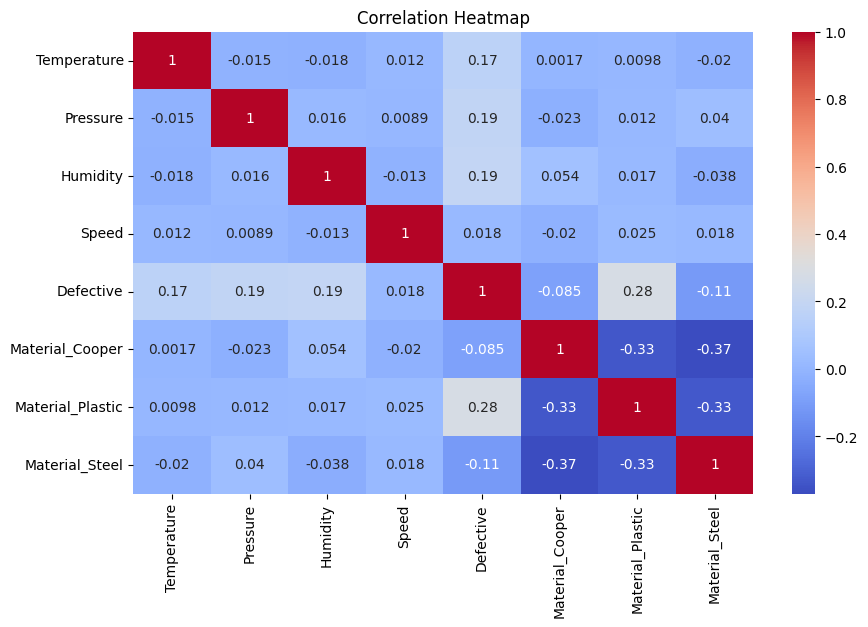

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df,columns = ['Material'],drop_first=True)

# df_encoded
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [11]:
X =df_encoded.drop('Defective',axis =1)
y = df_encoded['Defective']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,X_test.shape

((800, 7), (200, 7))

In [16]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred_test = clf.predict(X_test)

In [20]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       183
           1       1.00      0.24      0.38        17

    accuracy                           0.94       200
   macro avg       0.97      0.62      0.67       200
weighted avg       0.94      0.94      0.92       200



In [ ]:
2*precision*recall/(Precision + Recall)

In [42]:

df_compare = pd.DataFrame({'Predicted':y_pred_test,'Actual':y_test.values.tolist()})
true_pos = df_compare[(df_compare['Predicted']==1)&(df_compare['Actual']==1)].shape[0]
true_neg = df_compare[(df_compare['Predicted']==0)&(df_compare['Actual']==0)].shape[0]
false_pos = df_compare[(df_compare['Predicted']==1)&(df_compare['Actual']==0)].shape[0]
false_neg = df_compare[(df_compare['Predicted']==0)&(df_compare['Actual']==1)].shape[0]
accuracy = (true_pos+true_neg)/(true_neg+true_pos+false_neg+false_pos)
precision = true_pos/(true_pos+false_pos)
recall = true_pos/(true_pos+false_neg)
print(f'''1. True Positive: {true_pos}
2. True Negative: {true_neg}
3. False Postive: {false_pos}
4. False Negative: {false_neg}
5. Accuracy: {accuracy}
6. Precision: {precision}
7. Recall: {recall}''')

1. True Positive: 4
2. True Negative: 183
3. False Postive: 0
4. False Negative: 13
5. Accuracy: 0.935 
6. Precision: 1.0
7. Recall: 0.23529411764705882
